In [1]:
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from redcap.project import Project
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tableone import TableOne
from IPython.display import Markdown
from datetime import datetime
import numpy as np
from IPython.display import display
from PIL import Image
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon



import warnings
warnings.simplefilter("ignore")

sns.set_theme(style='white')

import sys
sys.path.append("/Users/golpira/Python/University of Calgary/RedCap-API-Git/RedCap_StudyLoader")
from redcap_classes import RedcapProcessor, Record, BloodDraw
from my_functions import my_tableone, analyze_hgb, plot_variables_over_time

In [2]:
### Teg-Hip
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_hip = os.getenv("REDCAP_TEG_HIP_API_KEY")

processor_1 = RedcapProcessor(api_url, api_key_hip)

df_hip= processor_1.fetch_and_process()
df_hip_demo=processor_1.get_all_demographics()


all_blood_hip = processor_1.get_all_blood_draws()
all_blood_hip[all_blood_hip['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]
# # print('=========================')
# print(processor_1.get_patient_demographics('TH-023'))


Removing the following StudyIDs from dataset:
 - TH-226: Treated non-operatively
310


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
171,TH-023,Admission,2018-08-31 19:15:00,2018-08-31 06:45:00,2018-08-31 06:45:00,-12.5,-12.5,-27.666667,-27.666667
660,TH-083,Admission,2019-06-16 16:00:00,2019-06-16 10:15:00,2019-06-16 10:15:00,-5.75,-5.75,-24.7,-24.7
1296,TH-163,Admission,2021-06-15 22:30:00,2021-06-15 17:15:00,2021-06-15 17:15:00,-5.25,-5.25,-15.266667,-15.266667
2136,TH-286,Admission,2023-11-10 16:30:00,2023-08-11 19:00:00,2023-08-11 19:00:00,-2181.5,-2181.5,3.683333,3.683333


In [3]:
df_hip['comorbidty_diabetes'].value_counts()

comorbidty_diabetes
No     4458
Yes     793
Name: count, dtype: int64

In [4]:
df_hip_demo['comorbidty_diabetes'].value_counts()

comorbidty_diabetes
No     263
Yes     47
Name: count, dtype: int64

In [5]:
display(processor_1.get_patient_blood_draws('TH-163')[['StudyID','Time','Injury_date','Draw_date_teg','injury_to_lab_hrs']])

,StudyID,Time,Injury_date,Draw_date_teg,injury_to_lab_hrs
0,TH-163,Admission,2021-06-15 22:30,2021-06-15 17:15:00,-5.250000
1,TH-163,Month3,2021-06-15 22:30,2021-09-07 11:20:00,2004.833333
2,TH-163,PFD1,2021-06-15 22:30,2021-06-16 08:30:00,10.000000
3,TH-163,POD5,2021-06-15 22:30,2021-06-21 06:00:00,127.500000
4,TH-163,POD2,2021-06-15 22:30,2021-06-18 06:52:00,56.366667
5,TH-163,POD7,2021-06-15 22:30,2021-06-23 07:25:00,176.916667


In [6]:
df_hip[df_hip['StudyID'].isin(['TH-039'])][['StudyID','complication_pulmonary', 'complication_cardiovascular','complication_infection','VTE_type','Death']].head(40)

,StudyID,complication_pulmonary,complication_cardiovascular,complication_infection,VTE_type,Death
752,TH-039,Yes,No,Yes,NaN,No
753,TH-039,Yes,No,Yes,NaN,No
754,TH-039,Yes,No,Yes,NaN,No
755,TH-039,Yes,No,Yes,NaN,No
756,TH-039,Yes,No,Yes,NaN,No
757,TH-039,Yes,No,Yes,NaN,No
758,TH-039,Yes,No,Yes,NaN,No
759,TH-039,Yes,No,Yes,NaN,No
760,TH-039,Yes,No,Yes,NaN,No
761,TH-039,Yes,No,Yes,NaN,No


In [7]:
all_blood_hip[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TH-001,Admission,2017-12-19 11:00:00,2017-12-19 20:34:00,2017-12-19 20:34:00,9.566667,9.566667,-18.666667,-18.666667
1,TH-001,Week2,2017-12-19 11:00:00,2018-01-02 11:17:00,2018-01-02 11:17:00,336.283333,336.283333,308.05,308.05
2,TH-001,Week6,2017-12-19 11:00:00,2018-01-30 14:10:00,2018-01-30 14:10:00,1011.166667,1011.166667,982.933333,982.933333
3,TH-001,Month3,2017-12-19 11:00:00,2018-03-22 13:45:00,2018-03-22 13:45:00,2234.75,2234.75,2206.516667,2206.516667
4,TH-001,PFD1,2017-12-19 11:00:00,2017-12-20 11:15:00,2017-12-20 11:15:00,24.25,24.25,-3.983333,-3.983333
...,...,...,...,...,...,...,...,...,...
2295,TH-311,Week2,2024-01-25 10:00:00,2024-02-14 11:45:00,2024-02-14 11:45:00,481.75,481.75,453.116667,453.116667
2296,TH-311,Week6,2024-01-25 10:00:00,2024-03-06 12:30:00,2024-03-06 12:30:00,986.5,986.5,957.866667,957.866667
2297,TH-311,Month3,2024-01-25 10:00:00,2024-04-16 09:30:00,2024-04-16 09:30:00,1967.5,1967.5,1938.866667,1938.866667
2298,TH-311,POD1,2024-01-25 10:00:00,2024-01-27 08:00:00,2024-01-27 08:00:00,46.0,46.0,17.366667,17.366667


In [8]:
# ### Hip Pathway
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_pathway = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")

processor_2 = RedcapProcessor(api_url, api_key_pathway)

df_pathway= processor_2.fetch_and_process()
df_pathway_demo=processor_2.get_all_demographics()

all_blood_pathway = processor_2.get_all_blood_draws()
display(all_blood_pathway[all_blood_pathway['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']])

# # print('=========================')
# print(processor_2.get_patient_demographics('HPA-028'))

31


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [9]:
df_pathway_demo['comorbidty_diabetes'].value_counts()

comorbidty_diabetes
No     26
Yes     5
Name: count, dtype: int64

In [10]:
df_pathway['comorbidty_diabetes'].value_counts()

comorbidty_diabetes
No     602
Yes    109
Name: count, dtype: int64

In [11]:
df_pathway[['StudyID','comorbidty_diabetes']]

,StudyID,comorbidty_diabetes
0,HPA-001,No
1,HPA-001,No
2,HPA-001,No
3,HPA-001,No
4,HPA-001,No
...,...,...
706,HPA-052,No
707,HPA-052,No
708,HPA-052,No
709,HPA-052,No


In [12]:
all_blood_pathway[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,HPA-001,Week2,2024-02-10 18:15:00,NaT,2024-02-23 07:00:00,<NA>,300.75,<NA>,256.900000
1,HPA-001,Admission,2024-02-10 18:15:00,NaT,2024-02-11 08:57:00,<NA>,14.70,<NA>,-29.150000
2,HPA-001,4 hr Pre-OP,2024-02-10 18:15:00,NaT,2024-02-12 12:00:00,<NA>,41.75,<NA>,-2.100000
3,HPA-001,PFD1,2024-02-10 18:15:00,2024-02-12 02:38:00,2024-02-12 00:00:00,32.383333,29.75,-11.466667,-14.100000
4,HPA-001,POD1,2024-02-10 18:15:00,NaT,2024-02-13 07:00:00,<NA>,60.75,<NA>,16.900000
...,...,...,...,...,...,...,...,...,...
278,HPA-052,4 hr Pre-OP,2025-10-28 09:30:00,NaT,2025-10-30 06:51:00,<NA>,45.35,<NA>,-2.083333
279,HPA-052,POD1,2025-10-28 09:30:00,2025-10-31 04:43:00,2025-10-31 07:00:00,67.216667,69.50,19.783333,22.066667
280,HPA-052,POD3,2025-10-28 09:30:00,2025-11-02 04:08:00,2025-11-02 07:00:00,114.633333,117.50,67.2,70.066667
281,HPA-052,POD5,2025-10-28 09:30:00,2025-11-04 04:28:00,2025-11-04 07:15:00,162.966667,165.75,115.533333,118.316667


In [13]:
load_dotenv()

### Teg-Femur
api_url = os.getenv("REDCAP_URL")
api_key_femur = os.getenv("REDCAP_TEG_FEMUR_API_KEY")

processor_3 = RedcapProcessor(api_url, api_key_femur)

df_femur= processor_3.fetch_and_process()
df_femur_demo=processor_3.get_all_demographics()

all_blood_femur = processor_3.get_all_blood_draws()
all_blood_femur[all_blood_femur['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

# # print('=========================')
print(processor_3.get_patient_demographics('TF-027'))

Removing the following StudyIDs from dataset:
 - TF-070: Multiple Surgery Patient_bilateral femur fracture
 - TF-084: Multiple Surgery Patient_bilateral femur fracture
 - TF-115: Multiple Surgery Patient_bilateral femur fracture
128
StudyID                                      TF-027
Age                                              40
Sex                                            Male
BMI                                          27.369
Injury_date                     2019-10-03 12:00:00
Admission_date                     2019-10-03 13:30
Surgery_date                    2019-10-04 13:55:00
AO_OTA                                         32-B
Treatment                                      None
DVT                                             Yes
PE                                              Yes
VTE_type                                       Both
VTE                                             Yes
comorbidty_diabetes                              No
comorbidty_cancer                      

In [14]:
print(df_femur.groupby('StudyID', as_index=False).first()['VTE_type'].value_counts())
df_femur[df_femur['VTE']=='Yes'][['StudyID','VTE_type']].drop_duplicates()

VTE_type
DVT     4
PE      1
Both    1
Name: count, dtype: int64


,StudyID,VTE_type
236,TF-022,PE
303,TF-027,Both
826,TF-069,DVT
869,TF-073,DVT
1000,TF-085,DVT
1417,TF-120,DVT


In [15]:
df_femur_demo[df_femur_demo['StudyID']=='TF-027']

,StudyID,Age,Sex,BMI,Injury_date,Admission_date,Surgery_date,AO_OTA,Treatment,DVT,...,comorbidty_cardiovascular,comorbidty_pulmonary,comorbidty_stroke,complication_pulmonary,complication_cardiovascular,complication_infection,Pre_op_doac,Death,Withdrawn,time_injury_to_surgery_hours
25,TF-027,40,Male,27.369,2019-10-03 12:00:00,2019-10-03 13:30,2019-10-04 13:55:00,32-B,None,DVT,...,No,No,No,No,No,No,No,No,No,25.916667


In [16]:
all_blood_femur[['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TF-002,Admission,2018-01-30 11:00:00,2018-01-30 20:17:00,2018-01-30 20:17:00,9.283333,9.283333,-12.016667,-12.016667
1,TF-002,Pre-Op,2018-01-30 11:00:00,2018-01-31 07:30:00,2018-01-31 07:30:00,20.5,20.5,-0.8,-0.8
2,TF-002,POD2,2018-01-30 11:00:00,2018-02-02 09:00:00,2018-02-02 09:00:00,70.0,70.0,48.7,48.7
3,TF-002,Week2,2018-01-30 11:00:00,2018-02-15 09:27:00,2018-02-15 09:27:00,382.45,382.45,361.15,361.15
4,TF-002,POST_OP,2018-01-30 11:00:00,2018-01-31 10:40:00,2018-01-31 10:40:00,23.666667,23.666667,2.366667,2.366667
...,...,...,...,...,...,...,...,...,...
720,TF-134,Week4,2025-10-02 14:15:00,2025-11-04 10:47:00,2025-11-04 10:47:00,788.533333,788.533333,769.2,769.2
721,TF-134,POD1,2025-10-02 14:15:00,2025-10-04 08:57:00,2025-10-04 08:57:00,42.7,42.7,23.366667,23.366667
722,TF-134,POD2,2025-10-02 14:15:00,2025-10-05 08:00:00,2025-10-05 08:00:00,65.75,65.75,46.416667,46.416667
723,TF-134,POD3,2025-10-02 14:15:00,2025-10-06 08:41:00,2025-10-06 08:41:00,90.433333,90.433333,71.1,71.1


In [17]:
load_dotenv()

### Teg-Pelvis
api_url = os.getenv("REDCAP_URL")
api_key_pelvis = os.getenv("REDCAP_TEG_PELVIS_API_KEY")

processor_4 = RedcapProcessor(api_url, api_key_pelvis)

df_pelvis= processor_4.fetch_and_process()
df_pelvis_demo=processor_4.get_all_demographics()

all_blood_pelvis = processor_4.get_all_blood_draws()
all_blood_pelvis[all_blood_pelvis['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']]

# # print('=========================')
# print(processor_4.get_patient_demographics('TPA-049'))

Removing the following StudyIDs from dataset:
 - TPA-019: Multiple Surgery Patient
 - TPA-028: Multiple Surgery Patient
 - TPA-043: Multiple Surgery Patient
 - TPA-048: Multiple Surgery Patient
 - TPA-056: Multiple Surgery Patient
 - TPA-079: Multiple Surgery Patient
 - TPANO-001: Excluded - Non-Operative Arm
 - TPANO-002: Excluded - Non-Operative Arm
 - TPANO-003: Excluded - Non-Operative Arm
 - TPANO-004: Excluded - Non-Operative Arm
 - TPANO-005: Excluded - Non-Operative Arm
 - TPANO-006: Excluded - Non-Operative Arm
 - TPANO-007: Excluded - Non-Operative Arm
 - TPANO-008: Excluded - Non-Operative Arm
 - TPANO-009: Excluded - Non-Operative Arm
 - TPANO-010: Excluded - Non-Operative Arm
 - TPANO-011: Excluded - Non-Operative Arm
 - TPANO-012: Excluded - Non-Operative Arm
96


,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs


In [18]:
ALL_TEG_DEMO=pd.concat([df_hip_demo,df_pathway_demo,df_femur_demo,df_pelvis_demo])
ALL_TEG_DEMO.to_excel('ALL_TEG_DEMO.xlsx', index=False)

In [19]:
ALL_TEG_BLOOD=pd.concat([all_blood_hip,all_blood_pathway,all_blood_femur,all_blood_pelvis])
ALL_TEG_BLOOD.to_excel('ALL_TEG_BLOOD.xlsx', index=False)

In [20]:
310+31+128+96

565

In [21]:
ALL_TEG_DEMO['StudyID'].nunique()

565

In [22]:
ALL_TEG_BLOOD['StudyID'].nunique()

550

In [23]:
ALL_TEG=pd.merge(ALL_TEG_DEMO,ALL_TEG_BLOOD, on=['StudyID','Injury_date','Surgery_date','Pre_op_doac'], how='outer', indicator=True)
ALL_TEG.to_excel('ALL_TEG.xlsx', index=False)

In [24]:
df_hip['comorbidty_diabetes'].value_counts()

comorbidty_diabetes
No     4458
Yes     793
Name: count, dtype: int64

In [25]:
df_pathway_demo['comorbidty_diabetes']

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8     Yes
9      No
10     No
11     No
12     No
13     No
14     No
15     No
16     No
17     No
18    Yes
19    Yes
20     No
21     No
22    Yes
23     No
24     No
25    Yes
26     No
27     No
28     No
29     No
30     No
Name: comorbidty_diabetes, dtype: object

In [26]:
ALL_TEG_DEMO['comorbidty_diabetes']

0     No
1     No
2     No
3     No
4     No
      ..
91    No
92    No
93    No
94    No
95    No
Name: comorbidty_diabetes, Length: 565, dtype: object

In [27]:
all_blood_pelvis[['StudyID','Time','Injury_date','Surgery_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']].head(20)

,StudyID,Time,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TPA-001,Admission,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-04 11:35:00,2020-02-04 11:35:00,20.583333,20.583333,-2.833333,-2.833333
1,TPA-001,Week2,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-14 11:01:00,2020-02-14 11:01:00,260.016667,260.016667,236.6,236.6
2,TPA-001,Week4,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-03-02 11:47:00,2020-03-02 11:47:00,668.783333,668.783333,645.366667,645.366667
3,TPA-001,Week6,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-03-16 10:51:00,2020-03-16 10:51:00,1003.85,1003.85,980.433333,980.433333
4,TPA-001,Month3,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-05-20 13:07:00,2020-05-20 13:07:00,2566.116667,2566.116667,2542.7,2542.7
5,TPA-001,POD1,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-05 14:40:00,2020-02-05 14:40:00,47.666667,47.666667,24.25,24.25
6,TPA-001,POD3,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-07 12:29:00,2020-02-07 12:29:00,93.483333,93.483333,70.066667,70.066667
7,TPA-001,POD5,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-09 14:37:00,2020-02-09 14:37:00,143.616667,143.616667,120.2,120.2
8,TPA-001,POD7,2020-02-03 15:00:00,2020-02-04 14:25:00,2020-02-11 12:47:00,2020-02-11 12:47:00,189.783333,189.783333,166.366667,166.366667
9,TPA-002,Admission,2020-02-18 14:00:00,2020-02-19 12:51:00,2020-02-19 09:38:00,2020-02-19 09:38:00,19.633333,19.633333,-3.216667,-3.216667


In [28]:
display(processor_4.get_patient_demographics('TPA-101'))


StudyID                                     TPA-101
Age                                              61
Sex                                          Female
BMI                                          45.073
Injury_date                     2025-08-21 10:00:00
Admission_date                     2025-08-21 18:00
Surgery_date                    2025-08-22 17:19:00
AO_OTA                                         None
Treatment                                      None
DVT                                              No
PE                                               No
VTE_type                                       None
VTE                                              No
comorbidty_diabetes                              No
comorbidty_cancer                                No
comorbidty_cardiovascular                        No
comorbidty_pulmonary                             No
comorbidty_stroke                                No
complication_pulmonary                           No
complication

In [29]:
df_pelvis[df_pelvis['StudyID']=='TPA-101'][['StudyID', 'Time', 'teg_preop_tp','teg_postop_tp1','teg_postop_tp2','teg_fu_tp']]

,StudyID,Time,teg_preop_tp,teg_postop_tp1,teg_postop_tp2,teg_fu_tp
1116,TPA-101,NaN,NaN,NaN,NaN,NaN
1117,TPA-101,NaN,NaN,NaN,NaN,NaN
1118,TPA-101,NaN,NaN,NaN,NaN,NaN
1119,TPA-101,Admission,Admission,NaN,NaN,NaN
1120,TPA-101,POD1,NaN,NaN,Day 1 post-op,NaN
1121,TPA-101,POD3,NaN,NaN,Day 3 post-op,NaN
1122,TPA-101,Admission,Admission,NaN,NaN,NaN
1123,TPA-101,POD5,NaN,NaN,Day 5 post-op,NaN
1124,TPA-101,NaN,NaN,NaN,NaN,NaN


In [30]:
df_pelvis[(df_pelvis['StudyID']=='TPA-101')&(df_pelvis['Time']=='Admission')][['StudyID','Time','Hemoglobin','MA','Sex','Age']]

,StudyID,Time,Hemoglobin,MA,Sex,Age
1119,TPA-101,Admission,NaN,NaN,Female,61
1122,TPA-101,Admission,131,64.4,NaN,NaN


In [31]:
display(processor_4.get_patient_blood_draws('TPA-101'))

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TPA-101,Admission,131,52,0.3,1.1,77.0,64.4,0.0,78.5,2025-08-21 10:00:00,2025-08-22 17:19:00,2025-08-22 10:49:00,2025-08-22 10:49:00,2025-08-22,24.816667,24.816667,-6.500000,-6.500000
1,TPA-101,POD1,78,50,0.2,0.9,78.4,68.0,0.0,69.2,2025-08-21 10:00:00,2025-08-22 17:19:00,2025-08-23 08:51:00,2025-08-23 08:51:00,2025-08-23,46.850000,46.850000,15.533333,15.533333
2,TPA-101,POD3,84,52,0.2,0.7,80.4,69.7,0.0,69.2,2025-08-21 10:00:00,2025-08-22 17:19:00,2025-08-25 07:58:00,2025-08-25 07:58:00,2025-08-25,93.966667,93.966667,62.650000,62.650000
3,TPA-101,POD5,87,52,0.2,0.6,82.3,72.7,0.0,69.2,2025-08-21 10:00:00,2025-08-22 17:19:00,2025-08-27 08:08:00,2025-08-27 08:08:00,2025-08-27,142.133333,142.133333,110.816667,110.816667


In [32]:
df_pelvis_demo[df_pelvis_demo['StudyID']=='TPA-102']

,StudyID,Age,Sex,BMI,Injury_date,Admission_date,Surgery_date,AO_OTA,Treatment,DVT,...,comorbidty_cardiovascular,comorbidty_pulmonary,comorbidty_stroke,complication_pulmonary,complication_cardiovascular,complication_infection,Pre_op_doac,Death,Withdrawn,time_injury_to_surgery_hours
95,TPA-102,64,Male,25.255,2025-09-18 11:00:00,2025-09-18 12:21,NaT,None,None,No,...,No,No,No,No,No,No,No,No,No,NaN


In [33]:
df_pelvis[df_pelvis['Time']== 'Pre-procedure 2'][['StudyID','Time','surg_date_pelvis','surg_date_ant_acet','surg_date_post_acet','teg_bd_date','Surgery_date']]

,StudyID,Time,surg_date_pelvis,surg_date_ant_acet,surg_date_post_acet,teg_bd_date,Surgery_date
401,TPA-035,Pre-procedure 2,NaN,NaN,NaN,2021-10-26,2021-10-19 14:30:00
428,TPA-037,Pre-procedure 2,NaN,NaN,NaN,2021-11-30,2021-11-30 13:55:00
521,TPA-046,Pre-procedure 2,NaN,NaN,NaN,2022-05-07,2022-05-03 12:47:00
550,TPA-049,Pre-procedure 2,NaN,NaN,NaN,2022-05-24,2022-05-24 13:14:00
822,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-17,2023-09-11 16:32:00
823,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-19,2023-09-11 16:32:00
824,TPA-073,Pre-procedure 2,NaN,NaN,NaN,2023-09-21,2023-09-11 16:32:00


In [34]:
# Get blood draws for patient TH-002
display(processor_1.get_patient_blood_draws('TH-002'))
display(processor_2.get_patient_blood_draws('HPA-009'))

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,TH-002,Admission,158,56,0.4,1.1,75.1,64.3,0.0,87.9,2017-12-19 14:27,2017-12-22 11:53,2017-12-20 09:00:00,2017-12-20 09:00:00,2017-12-20 09:00,18.550000,18.550000,-50.883333,-50.883333
1,TH-002,Week2,NaN,NaN,0.7,0.8,78.4,69.6,0.0,116.0,2017-12-19 14:27,2017-12-22 11:53,2018-01-03 12:15:00,2018-01-03 12:15:00,2018-01-03 12:15,357.800000,357.800000,288.366667,288.366667
2,TH-002,Week6,NaN,NaN,0.8,1.3,71.9,62.8,0.1,125.3,2017-12-19 14:27,2017-12-22 11:53,2018-02-05 10:20:00,2018-02-05 10:20:00,2018-02-05 10:20,1147.883333,1147.883333,1078.450000,1078.450000
3,TH-002,Month3,NaN,NaN,0.9,1.3,72.0,62.9,NaN,134.7,2017-12-19 14:27,2017-12-22 11:53,2018-03-19 10:40:00,2018-03-19 10:40:00,2018-03-19 10:40,2156.216667,2156.216667,2086.783333,2086.783333
4,TH-002,PFD1,NaN,NaN,0.3,1.4,73.5,61.5,0.0,78.5,2017-12-19 14:27,2017-12-22 11:53,2017-12-20 15:00:00,2017-12-20 15:00:00,2017-12-20 15:00,24.550000,24.550000,-44.883333,-44.883333
5,TH-002,PFD2,NaN,NaN,0.5,1.2,74.6,65.0,0.0,97.3,2017-12-19 14:27,2017-12-22 11:53,2017-12-21 14:40:00,2017-12-21 14:40:00,2017-12-21 14:40,48.216667,48.216667,-21.216667,-21.216667
6,TH-002,POD1,NaN,NaN,0.7,1.1,74.8,66.5,0.0,116.0,2017-12-19 14:27,2017-12-22 11:53,2017-12-22 13:50:00,2017-12-22 13:50:00,2017-12-22 13:50,71.383333,71.383333,1.950000,1.950000
7,TH-002,POD2,114,50,0.6,1.1,75.7,65.7,0.2,106.6,2017-12-19 14:27,2017-12-22 11:53,2017-12-23 14:30:00,2017-12-23 14:30:00,2017-12-23 14:30,96.050000,96.050000,26.616667,26.616667
8,TH-002,POD3,105,45,0.7,1.0,76.7,66.2,0.5,116.0,2017-12-19 14:27,2017-12-22 11:53,2017-12-24 15:00:00,2017-12-24 15:00:00,2017-12-24 15:00,120.550000,120.550000,51.116667,51.116667
9,TH-002,POD4,101,44,0.7,0.9,76.3,68.3,0.0,116.0,2017-12-19 14:27,2017-12-22 11:53,2017-12-25 14:30:00,2017-12-25 14:30:00,2017-12-25 14:30,144.050000,144.050000,74.616667,74.616667


,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
0,HPA-009,Week2,NaN,NaN,0.7,0.8,79.2,69.3,0.0,116.0,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-22 07:00:00,2024-04-22,NaN,302.166667,NaN,262.333333
1,HPA-009,Admission,NaN,NaN,0.5,1.2,75.5,61.4,0.1,97.3,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-10 09:00:00,2024-04-10,NaN,16.166667,NaN,-23.666667
2,HPA-009,Pre-draw,121,48,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-09 16:50:00,2024-04-11 08:40:00,2024-04-09 20:52:00,2024-04-09 00:00:00,2024-04-09,4.033333,-16.833333,-35.800000,-56.666667
3,HPA-009,4 hr Pre-OP,NaN,NaN,0.4,0.9,78.8,64.3,0.1,87.9,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-11 07:00:00,2024-04-11,NaN,38.166667,NaN,-1.666667
4,HPA-009,POD1,88,NaN,0.4,0.8,78.6,64.2,0.1,87.9,2024-04-09 16:50:00,2024-04-11 08:40:00,2024-04-12 07:20:00,2024-04-12 07:20:00,2024-04-12,62.500000,62.500000,22.666667,22.666667
5,HPA-009,POD3,87,NaN,0.5,0.8,79.3,68.9,0.0,97.3,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-14 08:00:00,2024-04-14,NaN,111.166667,NaN,71.333333
6,HPA-009,POD5,91,NaN,0.3,0.7,80.3,69.9,0.0,78.5,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-16 07:00:00,2024-04-16,NaN,158.166667,NaN,118.333333
7,HPA-009,POD7,86,NaN,0.3,0.8,79.2,68.1,0.0,78.5,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-04-18 07:00:00,2024-04-18,NaN,206.166667,NaN,166.333333
8,HPA-009,Unscheduled,NaN,NaN,0.6,0.8,78.2,67.0,0.0,106.6,2024-04-09 16:50:00,2024-04-11 08:40:00,NaT,2024-07-30 10:30:00,2024-07-30,NaN,2681.666667,NaN,2641.833333


In [35]:
df_demo=pd.concat([df_hip_demo,df_pathway_demo]).reset_index(drop=True)


df_demo_oac = df_demo[df_demo['Pre_op_doac'] == 'Yes']
df_blood_draws = pd.concat([processor_1.get_all_blood_draws(), processor_2.get_all_blood_draws()]).drop_duplicates().reset_index(drop=True)

# ONLY DOAC - Hemoglobin drop

In [36]:
df_blood_draws_oac = df_blood_draws[df_blood_draws['StudyID'].isin(df_demo_oac['StudyID'])]

In [37]:
df_blood_draws_oac

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,Pre_op_doac
1292,TH-162,Admission,118,52,0.5,0.8,78.4,66.9,0.0,97.3,2021-06-13 07:00:00,2021-06-14 21:44:00,2021-06-14 08:15:00,2021-06-14 08:15:00,2021-06-14 08:15,25.25,25.25,-13.483333,-13.483333,Yes
1293,TH-162,POD1,125,55,0.6,0.9,77.6,66.6,0.0,106.6,2021-06-13 07:00:00,2021-06-14 21:44:00,2021-06-15 07:05:00,2021-06-15 07:05:00,2021-06-15 07:05,48.083333,48.083333,9.35,9.35,Yes
1294,TH-162,POD7,109,NaN,0.7,0.8,79.9,70.9,0.0,116.0,2021-06-13 07:00:00,2021-06-14 21:44:00,2021-06-21 08:00:00,2021-06-21 08:00:00,2021-06-21 08:00,193.0,193.0,154.266667,154.266667,Yes
1295,TH-162,POD5,101,NaN,0.4,0.8,80.4,70.1,0.0,87.9,2021-06-13 07:00:00,2021-06-14 21:44:00,2021-06-19 08:30:00,2021-06-19 08:30:00,2021-06-19 08:30,145.5,145.5,106.766667,106.766667,Yes
1344,TH-170,Admission,128,NaN,0.2,0.8,80.5,68.7,0.0,69.2,2021-06-30 14:30:00,2021-07-02 09:16:00,2021-07-01 11:50:00,2021-07-01 11:50:00,2021-07-01 11:50,21.333333,21.333333,-21.433333,-21.433333,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,HPA-052,4 hr Pre-OP,120,64,0.2,0.8,79.2,67.2,0.0,69.2,2025-10-28 09:30:00,2025-10-30 08:56:00,NaT,2025-10-30 06:51:00,2025-10-30,<NA>,45.35,<NA>,-2.083333,Yes
2578,HPA-052,POD1,103,79,0.3,0.8,79.2,68.2,0.2,78.5,2025-10-28 09:30:00,2025-10-30 08:56:00,2025-10-31 04:43:00,2025-10-31 07:00:00,2025-10-31,67.216667,69.5,19.783333,22.066667,Yes
2579,HPA-052,POD3,102,64,0.3,0.7,81.1,69.8,0.2,78.5,2025-10-28 09:30:00,2025-10-30 08:56:00,2025-11-02 04:08:00,2025-11-02 07:00:00,2025-11-02,114.633333,117.5,67.2,70.066667,Yes
2580,HPA-052,POD5,99,73,0.2,0.7,81.6,71.9,0.1,69.2,2025-10-28 09:30:00,2025-10-30 08:56:00,2025-11-04 04:28:00,2025-11-04 07:15:00,2025-11-04,162.966667,165.75,115.533333,118.316667,Yes


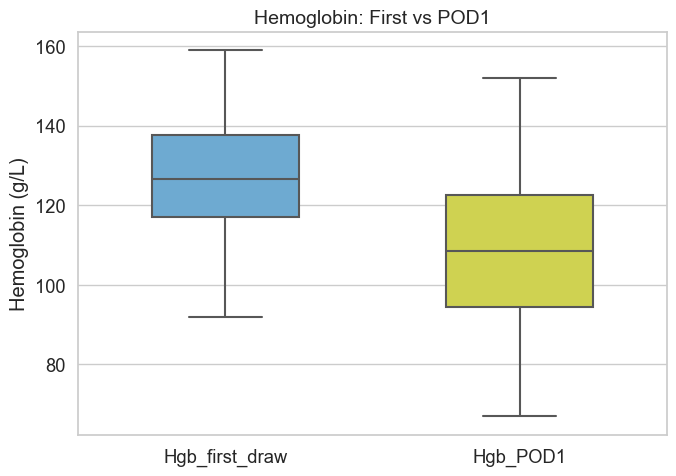

,Wilcoxon W,p-value,Median Difference (POD1 - First),95% CI Lower,95% CI Upper
0,21.0,2.587208e-07,-17.0,-25.0,-13.0


In [38]:
analyze_hgb(df_blood_draws_oac, pod_time="POD1")

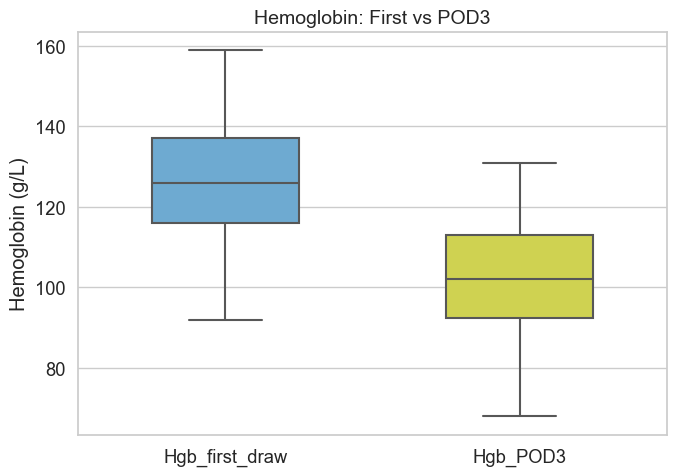

,Wilcoxon W,p-value,Median Difference (POD3 - First),95% CI Lower,95% CI Upper
0,7.5,1.386509e-07,-25.0,-31.0,-22.0


In [39]:
analyze_hgb(df_blood_draws_oac, pod_time="POD3")

In [40]:
# df_blood_draws[df_blood_draws['Time']=='Week2'].sort_values('StudyID')

In [41]:
df_blood_draws.head()

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,Pre_op_doac
0,TH-001,Admission,165,142,0.4,1.2,76.2,62.7,0.0,87.9,2017-12-19 11:00:00,2017-12-20 15:14:00,2017-12-19 20:34:00,2017-12-19 20:34:00,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No
1,TH-001,Week2,NaN,NaN,0.6,0.7,81.7,72.1,0.0,106.6,2017-12-19 11:00:00,2017-12-20 15:14:00,2018-01-02 11:17:00,2018-01-02 11:17:00,2018-01-02 11:17,336.283333,336.283333,308.05,308.05,No
2,TH-001,Week6,NaN,NaN,0.5,0.7,81.1,70.3,NaN,97.3,2017-12-19 11:00:00,2017-12-20 15:14:00,2018-01-30 14:10:00,2018-01-30 14:10:00,2018-01-30 14:10,1011.166667,1011.166667,982.933333,982.933333,No
3,TH-001,Month3,NaN,NaN,0.7,0.7,79.5,69.6,0.0,116.0,2017-12-19 11:00:00,2017-12-20 15:14:00,2018-03-22 13:45:00,2018-03-22 13:45:00,2018-03-22 13:45,2234.75,2234.75,2206.516667,2206.516667,No
4,TH-001,PFD1,NaN,NaN,0.2,0.8,78.4,63.3,0.0,69.2,2017-12-19 11:00:00,2017-12-20 15:14:00,2017-12-20 11:15:00,2017-12-20 11:15:00,2017-12-20 11:15,24.25,24.25,-3.983333,-3.983333,No


In [42]:
df_blood_draws[df_blood_draws['Time'].isin(['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4'])].head(10)

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,Injury_date,Surgery_date,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,Pre_op_doac
0,TH-001,Admission,165,142,0.4,1.2,76.2,62.7,0.0,87.9,2017-12-19 11:00:00,2017-12-20 15:14:00,2017-12-19 20:34:00,2017-12-19 20:34:00,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No
4,TH-001,PFD1,NaN,NaN,0.2,0.8,78.4,63.3,0.0,69.2,2017-12-19 11:00:00,2017-12-20 15:14:00,2017-12-20 11:15:00,2017-12-20 11:15:00,2017-12-20 11:15,24.25,24.25,-3.983333,-3.983333,No
10,TH-002,Admission,158,56,0.4,1.1,75.1,64.3,0.0,87.9,2017-12-19 14:27:00,2017-12-22 11:53:00,2017-12-20 09:00:00,2017-12-20 09:00:00,2017-12-20 09:00,18.55,18.55,-50.883333,-50.883333,No
14,TH-002,PFD1,NaN,NaN,0.3,1.4,73.5,61.5,0.0,78.5,2017-12-19 14:27:00,2017-12-22 11:53:00,2017-12-20 15:00:00,2017-12-20 15:00:00,2017-12-20 15:00,24.55,24.55,-44.883333,-44.883333,No
15,TH-002,PFD2,NaN,NaN,0.5,1.2,74.6,65.0,0.0,97.3,2017-12-19 14:27:00,2017-12-22 11:53:00,2017-12-21 14:40:00,2017-12-21 14:40:00,2017-12-21 14:40,48.216667,48.216667,-21.216667,-21.216667,No
21,TH-003,Admission,142,69,0.7,1.3,72.9,61.5,0.4,116.0,2018-01-29 14:45:00,2018-01-30 15:41:00,2018-01-29 20:55:00,2018-01-29 20:55:00,2018-01-29 20:55,6.166667,6.166667,-18.766667,-18.766667,No
30,TH-004,Admission,NaN,NaN,0.8,1.0,75.7,66.7,0.0,125.3,2018-03-31 11:30:00,2018-03-31 22:44:00,2018-03-31 18:55:00,2018-03-31 18:55:00,2018-03-31 18:55,7.416667,7.416667,-3.816667,-3.816667,No
31,TH-004,PFD1,NaN,NaN,0.7,1.0,77.1,66.7,0.0,116.0,2018-03-31 11:30:00,2018-03-31 22:44:00,2018-04-01 13:30:00,2018-04-01 13:30:00,2018-04-01 13:30,26.0,26.0,14.766667,14.766667,No
32,TH-005,Admission,147,74,0.6,1.8,72.2,59.3,0.0,106.6,2018-04-04 13:45:00,2018-04-07 10:38:00,2018-04-04 21:30:00,2018-04-04 21:30:00,2018-04-04 21:30,7.75,7.75,-61.133333,-61.133333,No
36,TH-005,PFD1,NaN,NaN,0.7,1.4,74.4,62.1,0.1,116.0,2018-04-04 13:45:00,2018-04-07 10:38:00,2018-04-05 14:45:00,2018-04-05 14:45:00,2018-04-05 14:45,25.0,25.0,-43.883333,-43.883333,No


## Created two columns to pick depending on if we want pre-op closest to injury or if we want pre-op closest to surgery

In [43]:
preop_timepoints = ['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4']

# Initialize new columns
df_blood_draws['closest_to_injury'] = 'No'
df_blood_draws['closest_to_surgery'] = 'No'


columns_to_check = ['R_time', 'K_time', 'MA', 'LY30', 'ACT','Alpha_Angle']

for patient_id, group in df_blood_draws.groupby('StudyID'):
    preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
    if not preop_draws.empty:
        # Filter out draws where all columns are NaN
        valid_draws = preop_draws.dropna(subset=columns_to_check, how='all')
        
        if not valid_draws.empty:
            # Closest to injury
            closest_idx = valid_draws['injury_to_lab_hrs'].idxmin()
            df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
            
            # Closest to surgery
            farthest_idx = valid_draws['injury_to_lab_hrs'].idxmax()
            df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'
        else:
            # If all draws are invalid, fallback to first/last pre-op draw
            df_blood_draws.loc[preop_draws.index[0], 'closest_to_injury'] = 'Yes'
            df_blood_draws.loc[preop_draws.index[-1], 'closest_to_surgery'] = 'Yes'
            
# # Loop over each patient
# for patient_id, group in df_blood_draws.groupby('StudyID'):
#     preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
#     if not preop_draws.empty:
#         # Closest to injury
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             closest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmin()
#         elif (preop_draws['Time'] == 'Admission').any():
#             closest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the first pre-op draw
#             closest_idx = preop_draws.index[0]
#         df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
        
#         # Closest to surgery (farthest from injury)
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             farthest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmax()
#         elif (preop_draws['Time'] == 'Admission').any():
#             farthest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the last pre-op draw
#             farthest_idx = preop_draws.index[-1]
#         df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'

# Update 'Time' for closest to injury
df_blood_draws['Time'] = np.where(
    df_blood_draws['closest_to_injury'] == 'Yes',
    'Pre_op',
    df_blood_draws['Time'])

In [44]:
# df_blood_draws[df_blood_draws['StudyID']=='TH-137']

In [45]:
df_blood_draws[df_blood_draws['closest_to_injury']=='Yes'].head()

,StudyID,Time,Hemoglobin,Creatinine,R_time,K_time,Alpha_Angle,MA,LY30,ACT,...,Draw_date_lab,Draw_date_teg,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,Pre_op_doac,closest_to_injury,closest_to_surgery
0.0,TH-001,Pre_op,165,142,0.4,1.2,76.2,62.7,0.0,87.9,...,2017-12-19 20:34:00,2017-12-19 20:34:00,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No,Yes,No
10.0,TH-002,Pre_op,158,56,0.4,1.1,75.1,64.3,0.0,87.9,...,2017-12-20 09:00:00,2017-12-20 09:00:00,2017-12-20 09:00,18.55,18.55,-50.883333,-50.883333,No,Yes,No
21.0,TH-003,Pre_op,142,69,0.7,1.3,72.9,61.5,0.4,116.0,...,2018-01-29 20:55:00,2018-01-29 20:55:00,2018-01-29 20:55,6.166667,6.166667,-18.766667,-18.766667,No,Yes,Yes
30.0,TH-004,Pre_op,NaN,NaN,0.8,1.0,75.7,66.7,0.0,125.3,...,2018-03-31 18:55:00,2018-03-31 18:55:00,2018-03-31 18:55,7.416667,7.416667,-3.816667,-3.816667,No,Yes,No
32.0,TH-005,Pre_op,147,74,0.6,1.8,72.2,59.3,0.0,106.6,...,2018-04-04 21:30:00,2018-04-04 21:30:00,2018-04-04 21:30,7.75,7.75,-61.133333,-61.133333,No,Yes,No


In [46]:
columns = ['Sex', 'Age', 'BMI','VTE_type','VTE']
groupby = 'Pre_op_doac'
categorical = ['Sex','VTE_type','VTE']

nonnormal=['BMI'] 
display(my_tableone(df_demo, cols=columns, cats=categorical, non_norm=nonnormal, group=groupby))

Missing           Overall                No  \
level_0             level_1                                               
n                                                 341               293   
Sex, n (%)          Female        0        220 (64.5)        191 (65.2)   
                    Male                   121 (35.5)        102 (34.8)   
Age, mean (SD)                    1       78.2 (11.1)       77.2 (11.2)   
BMI, median [Q1,Q3]              24  23.9 [20.5,27.4]  24.2 [20.6,27.9]   
VTE_type, n (%)     Both        329          2 (16.7)          2 (18.2)   
                    DVT                      6 (50.0)          5 (45.5)   
                    PE                       4 (33.3)          4 (36.4)   
VTE, n (%)          No            0        329 (96.5)        282 (96.2)   
                    Yes                      12 (3.5)          11 (3.8)   

                                          Yes P-Value  \
level_0             level_1                             
n                                          48           
Sex, n (%)          Female          29 (60.4)   0.633   
                    Male            19 (39.6)           
Age, mean (SD)                     84.5 (8.6)  <0.001   
BMI, median [Q1,Q3]          22.7 [19.9,25.3]   0.097   
VTE_type, n (%)     Both                        0.580   
                    DVT             1 (100.0)           
                    PE                                  
VTE, n (%)          No              47 (97.9)   1.000   
                    Yes               1 (2.1)           

                                                                  Test  
level_0             level_1                                             
n                                                                       
Sex, n (%)          Female                                 Chi-squared  
                    Male                                                
Age, mean (SD)                                       Two Sample T-test  
BMI, median [Q1,Q3]                                       Mann-Whitney  
VTE_type, n (%)     Both     Chi-squared (warning: expected count < 5)  
                    DVT                                                 
                    PE                                                  
VTE, n (%)          No                                  Fisher's exact  
                    Yes

In [47]:
columns = ['R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
groupby = 'Pre_op_doac'
categorical = []


for timepoint in ['Pre_op','POD1', 'POD3', 'POD5', 'POD7', 'Week2', 'Week4', 'Week6', 'Month3']:
    print(timepoint)
    print('++++++++++++++++++++++++++++++++++++++++++++')
    df=df_blood_draws[df_blood_draws['Time']==timepoint]


    

    nonnormal=[ 'R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
    display(my_tableone(df, cols=columns, cats=categorical, non_norm=nonnormal, group=groupby))

Pre_op
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,296,265,30,,
"R_time, median [Q1,Q3]",,8,"0.5 [0.4,0.6]","0.5 [0.4,0.6]","0.5 [0.3,0.7]",0.841,Mann-Whitney
"K_time, median [Q1,Q3]",,9,"1.3 [1.0,1.7]","1.3 [1.0,1.7]","1.1 [0.8,1.6]",0.115,Mann-Whitney
"MA, median [Q1,Q3]",,8,"62.9 [59.3,65.2]","62.8 [59.3,65.1]","63.5 [61.1,66.8]",0.325,Mann-Whitney
"LY30, median [Q1,Q3]",,15,"0.0 [0.0,0.5]","0.0 [0.0,0.5]","0.0 [0.0,0.2]",0.129,Mann-Whitney
"ACT, median [Q1,Q3]",,9,"97.3 [87.9,106.6]","97.3 [87.9,106.6]","97.3 [78.5,116.0]",0.798,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,8,"75.3 [72.8,77.0]","75.2 [72.7,76.9]","76.1 [73.2,78.3]",0.104,Mann-Whitney


POD1
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,313,266,47,,
"R_time, median [Q1,Q3]",,8,"0.5 [0.4,0.6]","0.5 [0.4,0.6]","0.4 [0.3,0.6]",0.451,Mann-Whitney
"K_time, median [Q1,Q3]",,9,"1.1 [0.9,1.3]","1.2 [0.9,1.4]","0.9 [0.8,1.2]",0.004,Mann-Whitney
"MA, median [Q1,Q3]",,8,"64.0 [60.8,66.5]","63.8 [60.5,66.4]","64.9 [62.5,67.1]",0.066,Mann-Whitney
"LY30, median [Q1,Q3]",,18,"0.1 [0.0,0.6]","0.2 [0.0,0.8]","0.0 [0.0,0.1]",0.0,Mann-Whitney
"ACT, median [Q1,Q3]",,8,"97.3 [87.9,106.6]","97.3 [87.9,106.6]","87.9 [78.5,101.9]",0.51,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,8,"76.6 [75.0,78.1]","76.4 [74.7,77.8]","77.6 [76.2,79.0]",0.001,Mann-Whitney


POD3
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,272,227,45,,
"R_time, median [Q1,Q3]",,7,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.3,0.6]",0.096,Mann-Whitney
"K_time, median [Q1,Q3]",,7,"0.8 [0.7,0.9]","0.8 [0.7,0.9]","0.8 [0.8,0.9]",0.284,Mann-Whitney
"MA, median [Q1,Q3]",,7,"68.0 [65.5,69.7]","68.0 [65.5,69.9]","67.5 [65.5,69.0]",0.32,Mann-Whitney
"LY30, median [Q1,Q3]",,11,"0.1 [0.0,0.5]","0.1 [0.0,0.6]","0.0 [0.0,0.2]",0.035,Mann-Whitney
"ACT, median [Q1,Q3]",,7,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [78.5,104.3]",0.09,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,7,"79.1 [77.8,80.3]","79.2 [77.8,80.3]","78.9 [77.5,79.9]",0.22,Mann-Whitney


POD5
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,247,203,44,,
"R_time, median [Q1,Q3]",,6,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.3,0.7]",0.003,Mann-Whitney
"K_time, median [Q1,Q3]",,6,"0.8 [0.7,0.8]","0.8 [0.7,0.8]","0.8 [0.7,0.8]",0.098,Mann-Whitney
"MA, median [Q1,Q3]",,6,"69.8 [67.8,71.1]","69.8 [67.9,71.2]","69.8 [67.6,70.5]",0.148,Mann-Whitney
"LY30, median [Q1,Q3]",,8,"0.0 [0.0,0.1]","0.0 [0.0,0.1]","0.0 [0.0,0.0]",0.119,Mann-Whitney
"ACT, median [Q1,Q3]",,6,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [80.8,116.0]",0.003,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,6,"79.9 [78.5,81.1]","80.0 [78.7,81.2]","79.7 [78.1,80.6]",0.094,Mann-Whitney


POD7
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,107,72,35,,
"R_time, median [Q1,Q3]",,2,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.4 [0.3,0.6]",0.067,Mann-Whitney
"K_time, median [Q1,Q3]",,2,"0.7 [0.7,0.8]","0.7 [0.7,0.8]","0.7 [0.7,0.8]",0.648,Mann-Whitney
"MA, median [Q1,Q3]",,2,"70.6 [68.6,71.8]","70.5 [68.7,72.5]","70.6 [68.1,71.5]",0.423,Mann-Whitney
"LY30, median [Q1,Q3]",,2,"0.0 [0.0,0.0]","0.0 [0.0,0.0]","0.0 [0.0,0.0]",0.288,Mann-Whitney
"ACT, median [Q1,Q3]",,2,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","87.9 [78.5,106.6]",0.075,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,2,"80.5 [79.1,81.3]","80.5 [79.2,81.3]","80.2 [79.1,81.2]",0.375,Mann-Whitney


Week2
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,241,206,35,,
"R_time, median [Q1,Q3]",,4,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.3,0.7]",0.08,Mann-Whitney
"K_time, median [Q1,Q3]",,4,"0.8 [0.7,0.8]","0.8 [0.7,0.8]","0.7 [0.7,0.8]",0.48,Mann-Whitney
"MA, median [Q1,Q3]",,4,"70.7 [68.6,72.4]","70.7 [68.6,72.5]","71.1 [69.1,72.2]",0.948,Mann-Whitney
"LY30, median [Q1,Q3]",,6,"0.0 [0.0,0.1]","0.0 [0.0,0.1]","0.0 [0.0,0.0]",0.308,Mann-Whitney
"ACT, median [Q1,Q3]",,4,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [83.2,116.0]",0.08,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,4,"80.4 [79.0,81.6]","80.3 [79.0,81.5]","80.8 [79.2,81.7]",0.523,Mann-Whitney


Week4
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,173,140,33,,
"R_time, median [Q1,Q3]",,11,"0.4 [0.3,0.5]","0.4 [0.3,0.5]","0.5 [0.4,0.7]",0.097,Mann-Whitney
"K_time, median [Q1,Q3]",,11,"0.8 [0.8,1.0]","0.8 [0.8,1.1]","0.8 [0.8,0.9]",0.098,Mann-Whitney
"MA, median [Q1,Q3]",,11,"67.2 [65.1,69.4]","67.0 [64.8,69.1]","68.3 [66.3,70.0]",0.096,Mann-Whitney
"LY30, median [Q1,Q3]",,15,"0.0 [0.0,0.3]","0.0 [0.0,0.4]","0.0 [0.0,0.1]",0.348,Mann-Whitney
"ACT, median [Q1,Q3]",,11,"87.9 [78.5,97.3]","87.9 [78.5,97.3]","97.3 [87.9,116.0]",0.079,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,11,"78.0 [76.5,79.7]","77.9 [76.4,79.6]","78.9 [77.3,80.1]",0.075,Mann-Whitney


Week6
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,238,204,34,,
"R_time, median [Q1,Q3]",,10,"0.5 [0.4,0.6]","0.4 [0.4,0.6]","0.5 [0.4,0.7]",0.027,Mann-Whitney
"K_time, median [Q1,Q3]",,10,"1.0 [0.8,1.2]","1.0 [0.8,1.2]","1.0 [0.8,1.1]",0.674,Mann-Whitney
"MA, median [Q1,Q3]",,10,"66.0 [63.7,68.1]","66.0 [63.6,68.1]","65.9 [64.0,67.3]",0.874,Mann-Whitney
"LY30, median [Q1,Q3]",,14,"0.1 [0.0,0.5]","0.1 [0.0,0.5]","0.0 [0.0,0.4]",0.436,Mann-Whitney
"ACT, median [Q1,Q3]",,10,"97.3 [87.9,106.6]","87.9 [87.9,106.6]","97.3 [87.9,116.0]",0.027,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,10,"77.0 [75.8,78.5]","77.0 [75.8,78.5]","76.7 [75.8,78.0]",0.801,Mann-Whitney


Month3
++++++++++++++++++++++++++++++++++++++++++++


,,Missing,Overall,No,Yes,P-Value,Test
level_0,level_1,,,,,,
n,,,233,203,30,,
"R_time, median [Q1,Q3]",,10,"0.5 [0.4,0.6]","0.5 [0.3,0.6]","0.5 [0.5,0.7]",0.008,Mann-Whitney
"K_time, median [Q1,Q3]",,10,"1.1 [0.9,1.3]","1.2 [0.9,1.3]","1.1 [0.9,1.2]",0.169,Mann-Whitney
"MA, median [Q1,Q3]",,10,"64.8 [61.6,66.5]","64.7 [61.4,66.5]","65.1 [62.0,66.7]",0.554,Mann-Whitney
"LY30, median [Q1,Q3]",,17,"0.1 [0.0,0.6]","0.1 [0.0,0.7]","0.0 [0.0,0.4]",0.133,Mann-Whitney
"ACT, median [Q1,Q3]",,10,"97.3 [87.9,106.6]","97.3 [78.5,106.6]","97.3 [97.3,116.0]",0.008,Mann-Whitney
"Alpha_Angle, median [Q1,Q3]",,10,"76.1 [74.4,77.6]","76.0 [74.2,77.6]","76.4 [75.5,78.0]",0.283,Mann-Whitney


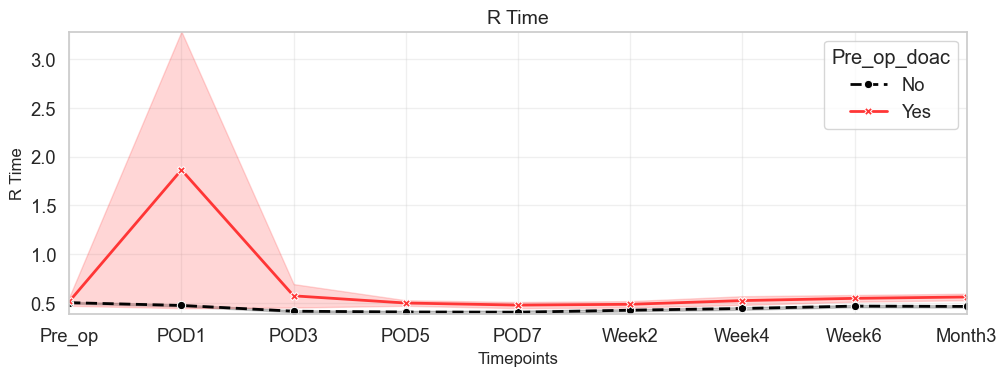

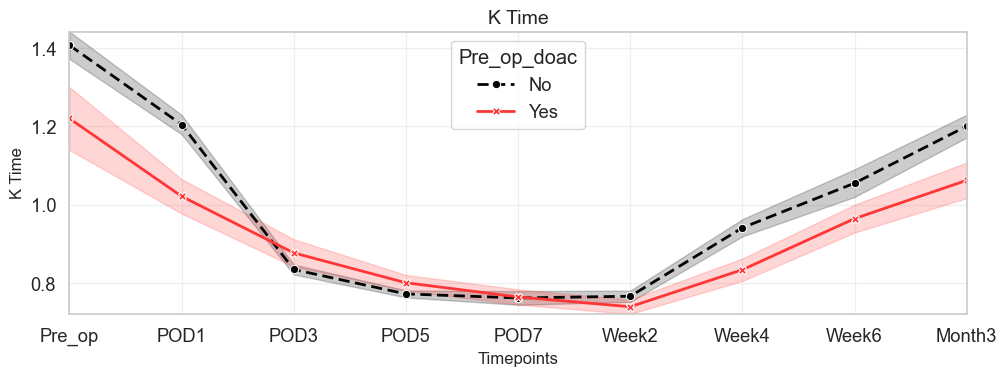

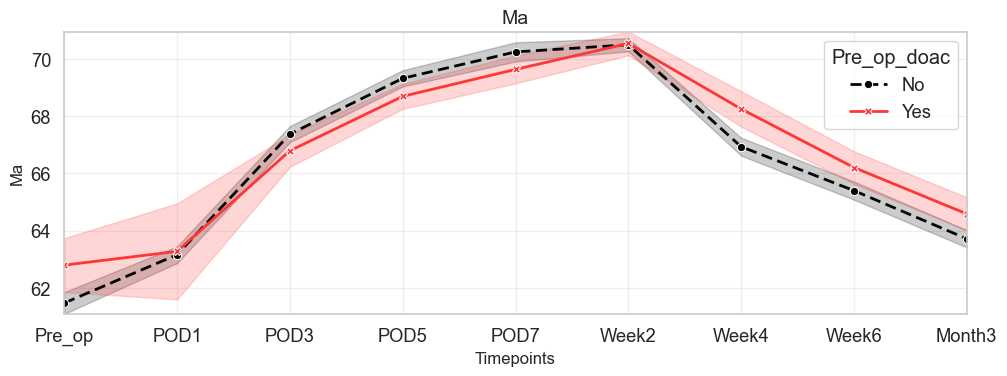

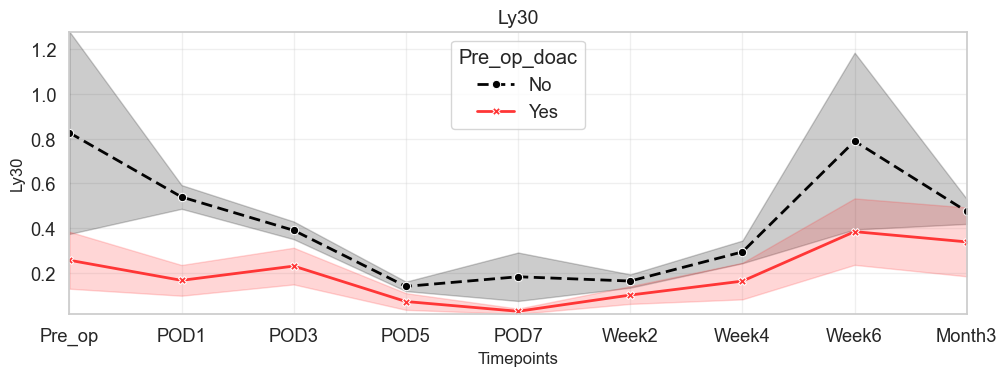

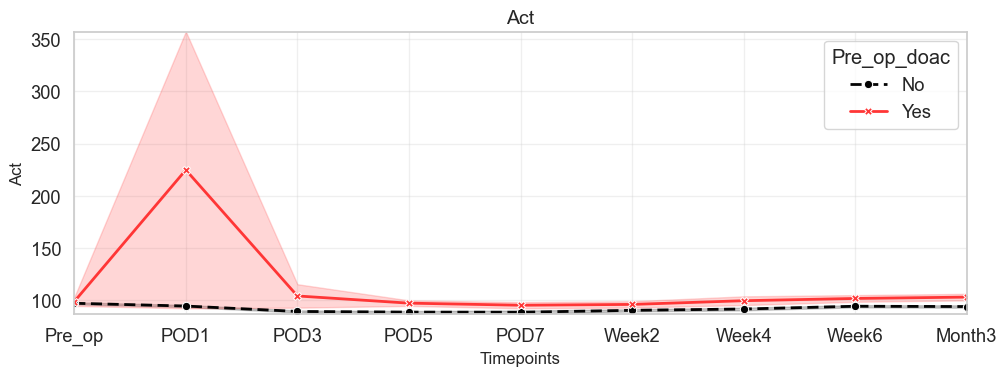

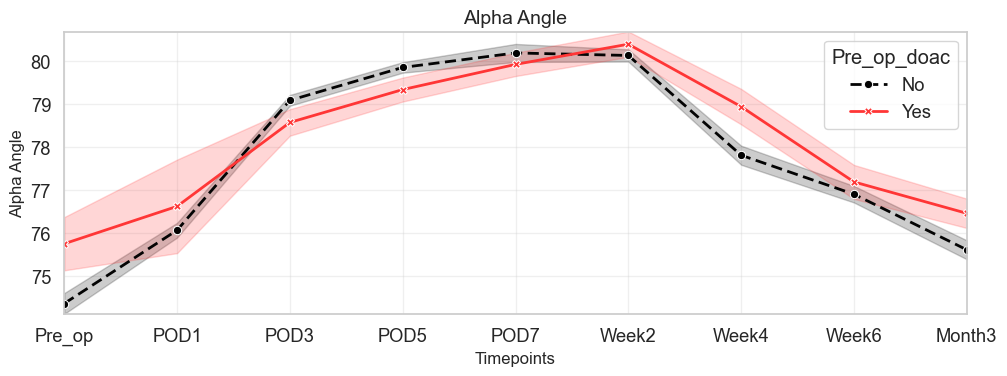

In [48]:
for col in columns:
    df_blood_draws[col] = pd.to_numeric(df_blood_draws[col], errors='coerce')

    
plot_variables_over_time(df_blood_draws,
                         hue='Pre_op_doac', 
    style='Pre_op_doac',
    palette={'Yes':"#ff3636", 'No':"#030303"},
    
    # var_labels=var_labels,
    xlabel="Timepoints",
)

In [49]:
df_blood_draws[(df_blood_draws['StudyID']=='TH-190')&(df_blood_draws['Time']=='Pre_op')][['Time','LY30','Pre_op_doac']]

,Time,LY30,Pre_op_doac


In [50]:
display(processor_1.get_patient_blood_draws('TH-188')[['Time','LY30']])

,Time,LY30
0,Admission,NaN
1,Week4,0.0
2,Week6,0.0
3,Month3,0.0
4,Pre-Op,0.0
5,POD3,0.0
6,POD5,0.0
7,POD7,0.0


In [51]:
# 0

In [52]:
# hip_blood[hip_blood['Time'].isin(['Admission','PFD1','PFD2','PFD3','PFD4'])]

In [53]:



# project = Project(api_url, api_key)

# # Export all records directly (no report needed)
# records_data = project.export_records()  # returns list of dicts

# # Convert to DataFrame
# df = pd.DataFrame(records_data)

# # Convert to DataFrame
# df = pd.DataFrame(records_data)


# # Create Record objects from DataFrame
# record_objects = {}

# for _, row in df.iterrows():  # iterate over DataFrame rows
#     record_id = row['patient_id']  # use correct column name
#     if record_id not in record_objects:
#         record_objects[record_id] = Record(record_id)
    
#     draw_id = row['lab_dt_blood_draw']
#     if pd.notna(draw_id):  # only create BloodDraw if there is a timestamp
#         # Dynamically get lab columns
#         lab_columns = ['lab_rteg_timepoint','lp_hemoglobin', 'lp_creatinine', 'rteg_crt_rvalue', 
#                        'rteg_crt_ktime', 'rteg_crt_aangle', 'rteg_crt_ma',
#                        'rteg_crt_ly30', 'rteg_crt_tegact']
#         lab_data = {col: row[col] for col in lab_columns if pd.notna(row[col])}

#         blood_draw = BloodDraw(draw_id=draw_id, **lab_data)
#         record_objects[record_id].add_blood_draw(blood_draw)

# # ### Hip Pathway
# # load_dotenv()

# # # Retrieve environment variables
# # api_key = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")
# # api_url = os.getenv("REDCAP_URL")

# # project = Project(api_url, api_key)

# # df2 = project.export_report(report_id="16762",format_type="df", raw_or_label='label',df_kwargs={"index_col": None}).reset_index(drop=True)  

In [54]:
# df1_std = loader.prepare_dataframe(df1, add_med=True, add_vte=True)
# df2_std = loader.prepare_dataframe(df2, add_med=True, add_vte=True)

# # Merge
# merged_df = pd.concat([df1_std, df2_std], ignore_index=True)

In [55]:
print('Total Number:', df.StudyID.nunique())

Total Number: 233


In [56]:
merged_df['StudyID'].nunique()

NameError: name 'merged_df' is not defined

## Finding StudyIDs that do not have value at "Admission"

In [ ]:
# Find all StudyIDs with Admission
with_admission = merged_df.loc[merged_df['Time'] == 'Admission', 'StudyID'].unique()

# Find all StudyIDs
all_ids = merged_df['StudyID'].unique()

# Get the ones without Admission
without_admission = list(set(all_ids) - set(with_admission))

print(without_admission)


'''These patients withdrew and not much data available and should be excluded.''' 

In [ ]:
# merged_df= merged_df[merged_df['Time']!='nan'].copy()
merged_df = merged_df[merged_df['Time'].notna()].copy()

In [ ]:
merged_df['VTE'].value_counts(dropna=False)

## Asked Casandra to fix these duplicates

In [ ]:
df_ = merged_df[merged_df['Time']=='Admission']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='POD5']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='Week2']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
relevant_timepoints = ['Admission','Pre-Op','Pre-draw','PFD1','PFD2','PFD3','PFD4','4 hr Pre-OP']

hgb_drop_df = loader.compute_hb_drop(merged_df, relevant_timepoints=relevant_timepoints, timepoint_end='POD1')
display(hgb_drop_df.head())
print(len(hgb_drop_df))

print('These werent included in original file I gave to Prism:')
'''["TH-025","TH-033","TH-095","TH-156","TH-157","TH-175","TH-183","TH-196","TH-197","TH-199","TH-218","TH-230","TH-238","TH-263"]'''

In [ ]:
# Just looking at some of the values
merged_df[merged_df['StudyID']=='TH-095'][['StudyID','Time','hours_from_injury_to_bloodDraw','Hemoglobin','blood_draw_label','VTE']]

In [ ]:
columns = ['Age', 'Sex', 'BMI','VTE']
categorical = ['Sex','VTE']
nonnormal=['BMI']

subset_df = merged_df[(merged_df['Time'] == 'Admission')]
subset_df=subset_df.drop_duplicates(subset=['StudyID','Time'], keep='first')
  
subset_df
table1 = TableOne(
    subset_df,
    columns=columns,
    groupby='DOAC_status',
    categorical=categorical,
    nonnormal=nonnormal,
    normal_test=True
)


table1

In [ ]:
display(tb.table1(hgb_drop_df, columns=['Hb_Drop'],group='DOAC_status', nonnormal=[],categorical=[]))

plt.figure(figsize=(8,6))
sns.boxplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, palette='Set2')

# Overlay individual points
sns.stripplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, color='black', alpha=0.6, jitter=False)

# Labels
plt.title('Hemoglobin Drop: OAC vs Non-OAC')
plt.ylabel('Hemoglobin Drop (g/L)')
plt.xlabel('DOAC_status Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Only OACs

In [ ]:
hgb_drop_OAC = hgb_drop_df[hgb_drop_df['DOAC_status']=='OAC'].dropna(subset=['Hb_Drop'])

In [ ]:
hgb_drop_OAC['delta_Hgb'] = hgb_drop_OAC['POD1_Hgb'] - hgb_drop_OAC['first_draw_Hgb']
stat, p_val = wilcoxon(hgb_drop_OAC['first_draw_Hgb'], hgb_drop_OAC['POD1_Hgb'])
median_diff = hgb_drop_OAC['delta_Hgb'].median()


np.random.seed(200)
boot_medians = [
    np.median(np.random.choice(hgb_drop_OAC['delta_Hgb'], size=len(hgb_drop_OAC), replace=True))
    for _ in range(5000)
]
ci_lower, ci_upper = np.percentile(boot_medians, [2.5, 97.5])

# Put results in a DataFrame
results_df = pd.DataFrame({
    'Wilcoxon W': [stat],
    'p-value': [p_val],
    'Median Difference (POD1 - First)': [median_diff],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})

display(results_df)



df_long = hgb_drop_OAC.melt(value_vars=['first_draw_Hgb', 'POD1_Hgb'],
                       var_name='Timepoint', value_name='Hemoglobin')

# Set Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)
custom_palette = ['#5DADE2', "#E4E73C"]  # Blue and red


plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_long,
    x='Timepoint',
    y='Hemoglobin',
    palette=custom_palette,
    width=0.5,
    linewidth=1.5,
    fliersize=0
)
# Titles and labels
plt.title('Hemoglobin: First vs POD1', fontsize=14)
plt.ylabel('Hemoglobin (g/L)')
plt.xlabel('')
plt.tight_layout()

In [ ]:

merged_df['VTE']=np.where(merged_df['VTE'].isin(['PE','DVT','Both']), 'VTE','No VTE')
custom_order = ['Admission', 'POD1', 'POD3', 'POD5', 'Week2', 'Week4', 'Week6', 'Month3']
custom_palette = {'VTE': "#EE6F20", 'No VTE': 'black'}
variables = ['MA','R_time']

loader.plot_variables_over_time(df=merged_df, variables=variables,
                                custom_order=custom_order, 
                                hue='VTE', style='VTE',
                                custom_palette=custom_palette,
                                save_folder="plots")


In [ ]:
conditions = [
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 24),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 24) & (merged_df['hours_from_injury_to_bloodDraw'] <= 48),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 72),



    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 30)),
    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 78))
]

# Define corresponding labels
labels = [
    '0-24h post_injury',
    '25-48h post_injury',
    '49-72h post_injury',
    'POD1',
    'POD3'
]

# Apply classification
merged_df['time_classifications'] = np.select(conditions, labels, default='')